In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.animation import FuncAnimation

df_industry=pd.read_excel('./zatrudnienie_w_przemysle.xls',usecols=["Country Name","2016"])
df_agriculture=pd.read_excel('./zatrudnienie_w_rolnictwie.xls',usecols=["Country Name","2016"])
df_agriculture=df_agriculture.fillna(0)
df_industry=df_industry.fillna(0)

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\pstrz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pstrz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pstrz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

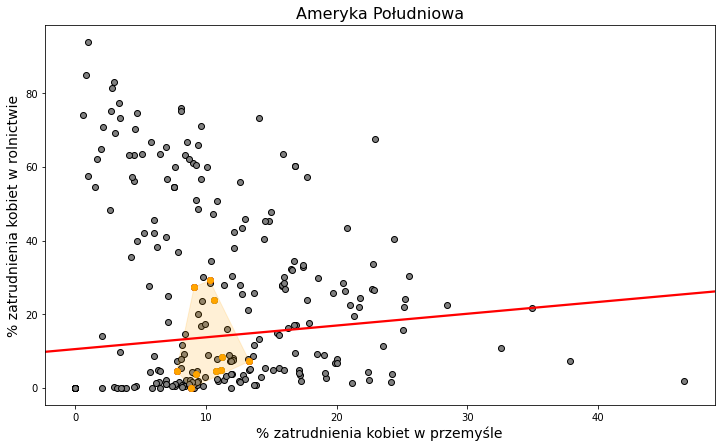

In [2]:
x=[]
y=[]

for i in range(266):
    x.append(df_industry["2016"][i])
    y.append(df_agriculture["2016"][i])

lista_europa=[]
lista = ['Albania','Andorra','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Czech Republic',
        'Denmark','Estonia','Finland','France','Greece','Holy See','Hungary','Iceland','Italy','Ireland','Latvia',
         'Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia',
        'Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden',
        'Switzerland','Ukraine','United Kingdom']

lista_amerykapld=[]
lista1=['Brazil','Colombia','Argentina','Peru','Venezuela','Chile','Ecuador','Bolivia','Parguay','Uruguay',
                          'Guyana','Suriname','French Guiana','Falkland Islands']

for i in range(266):
    if(df_industry["Country Name"][i] in lista):
        lista_europa.append([df_industry["2016"][i],df_agriculture["2016"][i]])
    if(df_industry["Country Name"][i] in lista1):
        lista_amerykapld.append([df_industry["2016"][i],df_agriculture["2016"][i]])


def Powloka(lista_pkt):
    powloka = ConvexHull(lista_pkt)
    indeksy = powloka.vertices
    punktyPowloki = np.array(lista_pkt)[indeksy, :]
    return punktyPowloki

lista_europa1 = lista_europa
lista_amerykapld1 = lista_amerykapld

lista_europa=Powloka(lista_europa)
lista_amerykapld=Powloka(lista_amerykapld)

fig=plt.figure(figsize=(12,7))

def animuj(i):
    plt.clf()  
    ax=fig.add_subplot()
    ax.set_xlabel("% zatrudnienia kobiet w przemyśle",fontsize=14)
    ax.set_ylabel("% zatrudnienia kobiet w rolnictwie",fontsize=14)
    plt.scatter(x,y,color="grey",edgecolor="black")
    if(i<7):
        ax.set_title("Europa",fontsize=16)
        sns.regplot(np.array(lista_europa)[:,0],np.array(lista_europa)[:,1],ci=None,color="red",truncate=False)
        plot1 = plt.plot(np.array(lista_europa1)[:,0],np.array(lista_europa1)[:,1],'o',color='blue')
        plt.fill(np.array(lista_europa)[:,0], np.array(lista_europa)[:,1], fill=True, color='blue', alpha=0.3-3*((i+1)/100))
        return plot1,
    else:
        ax.set_title("Ameryka Południowa",fontsize=16)
        sns.regplot(np.array(lista_amerykapld)[:,0],np.array(lista_amerykapld)[:,1],ci=None,color="red",truncate=False)
        plot2 = plt.plot(np.array(lista_amerykapld1)[:,0],np.array(lista_amerykapld1)[:,1],'o',color='orange')
        plt.fill(np.array(lista_amerykapld)[:,0], np.array(lista_amerykapld)[:,1], fill=True, color='orange', alpha=0.37-3*((i+1-7)/100))
        return plot2,


anim = FuncAnimation(fig, animuj, frames=14, interval=400)
anim.save('08_str_277094.gif')
    